In [5]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
from PIL import Image

In [7]:
mask = Image.open("output/0/00001.png").convert('L')
mask = np.array(mask)/255.0

In [10]:
mask = torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()

In [22]:
dilated_mask = F.max_pool2d(mask, kernel_size=15, stride=1, padding=1)
erosion_mask = F.max_pool2d(1-mask, kernel_size=15, stride=1, padding=1)
erosion_mask = 1 - erosion_mask

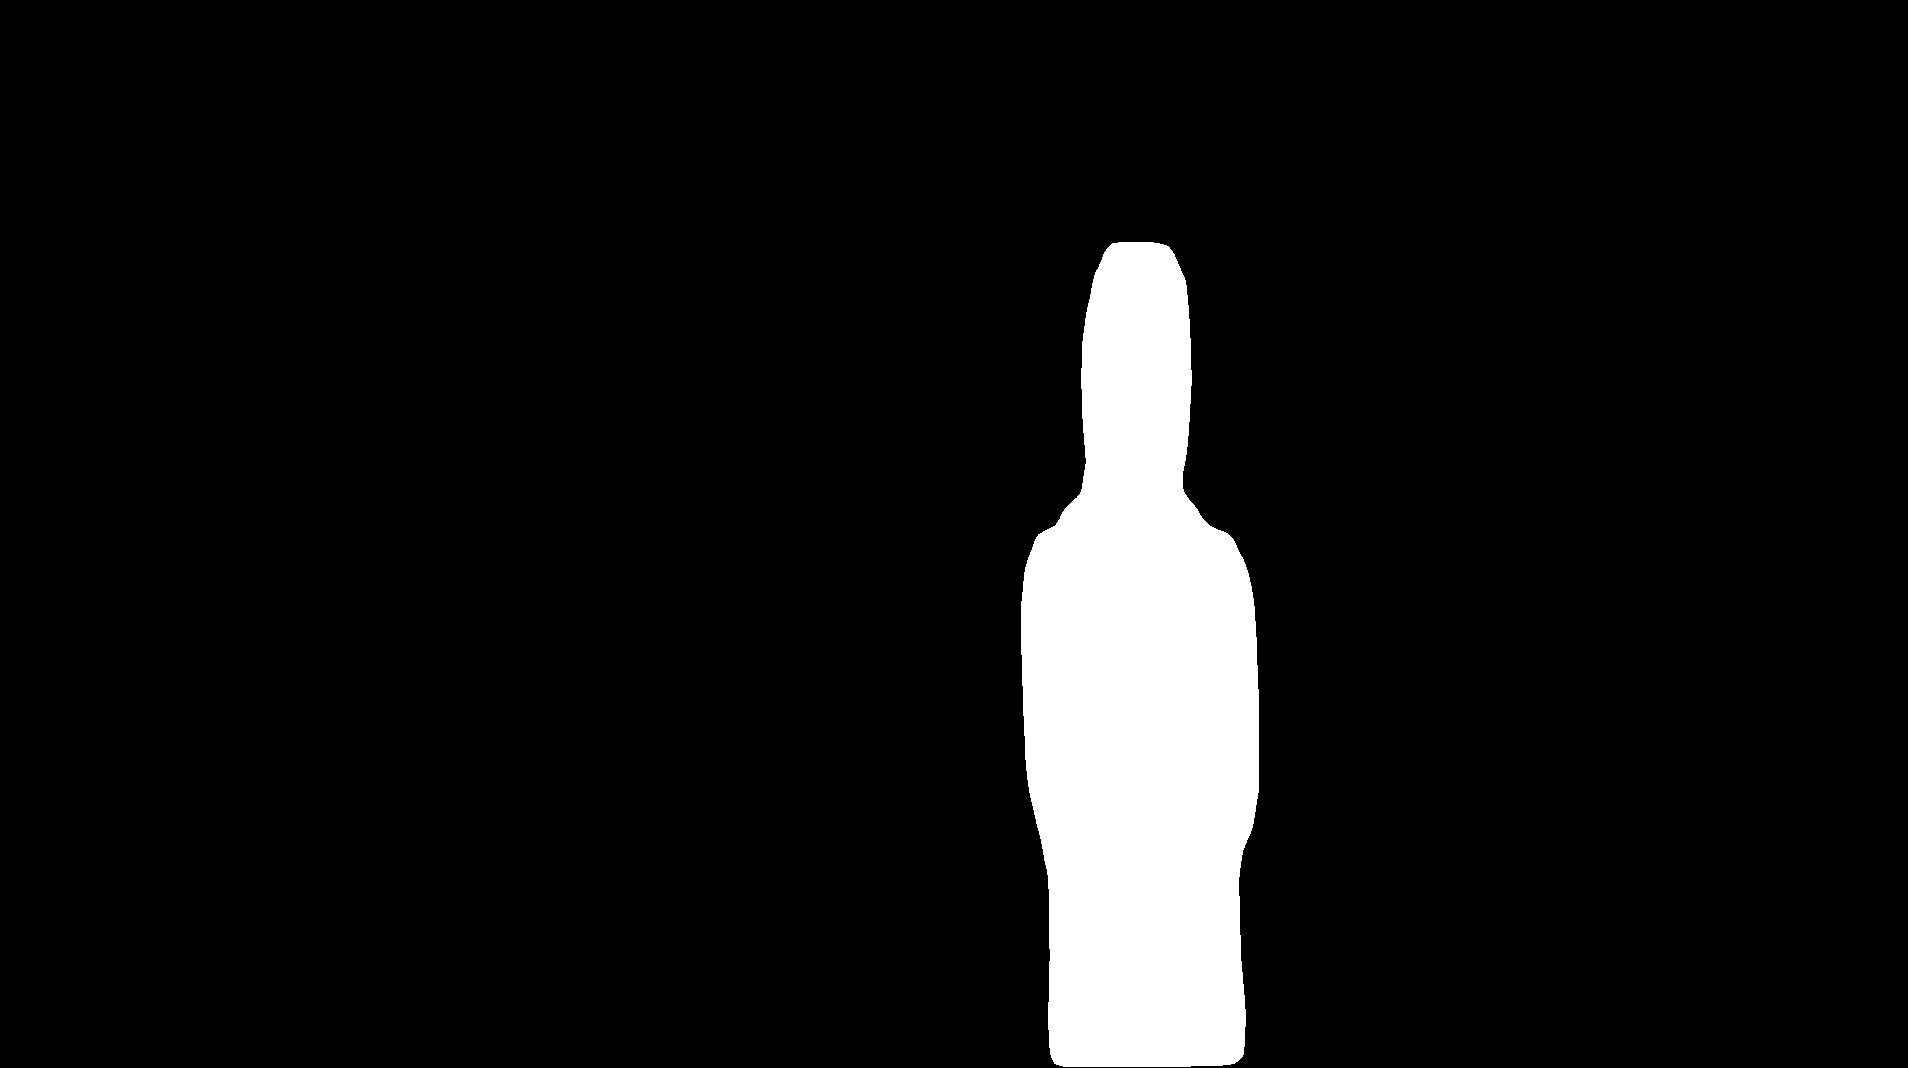

In [19]:
Image.fromarray(dilated_mask.numpy()[0,0].astype('uint8') * 255)

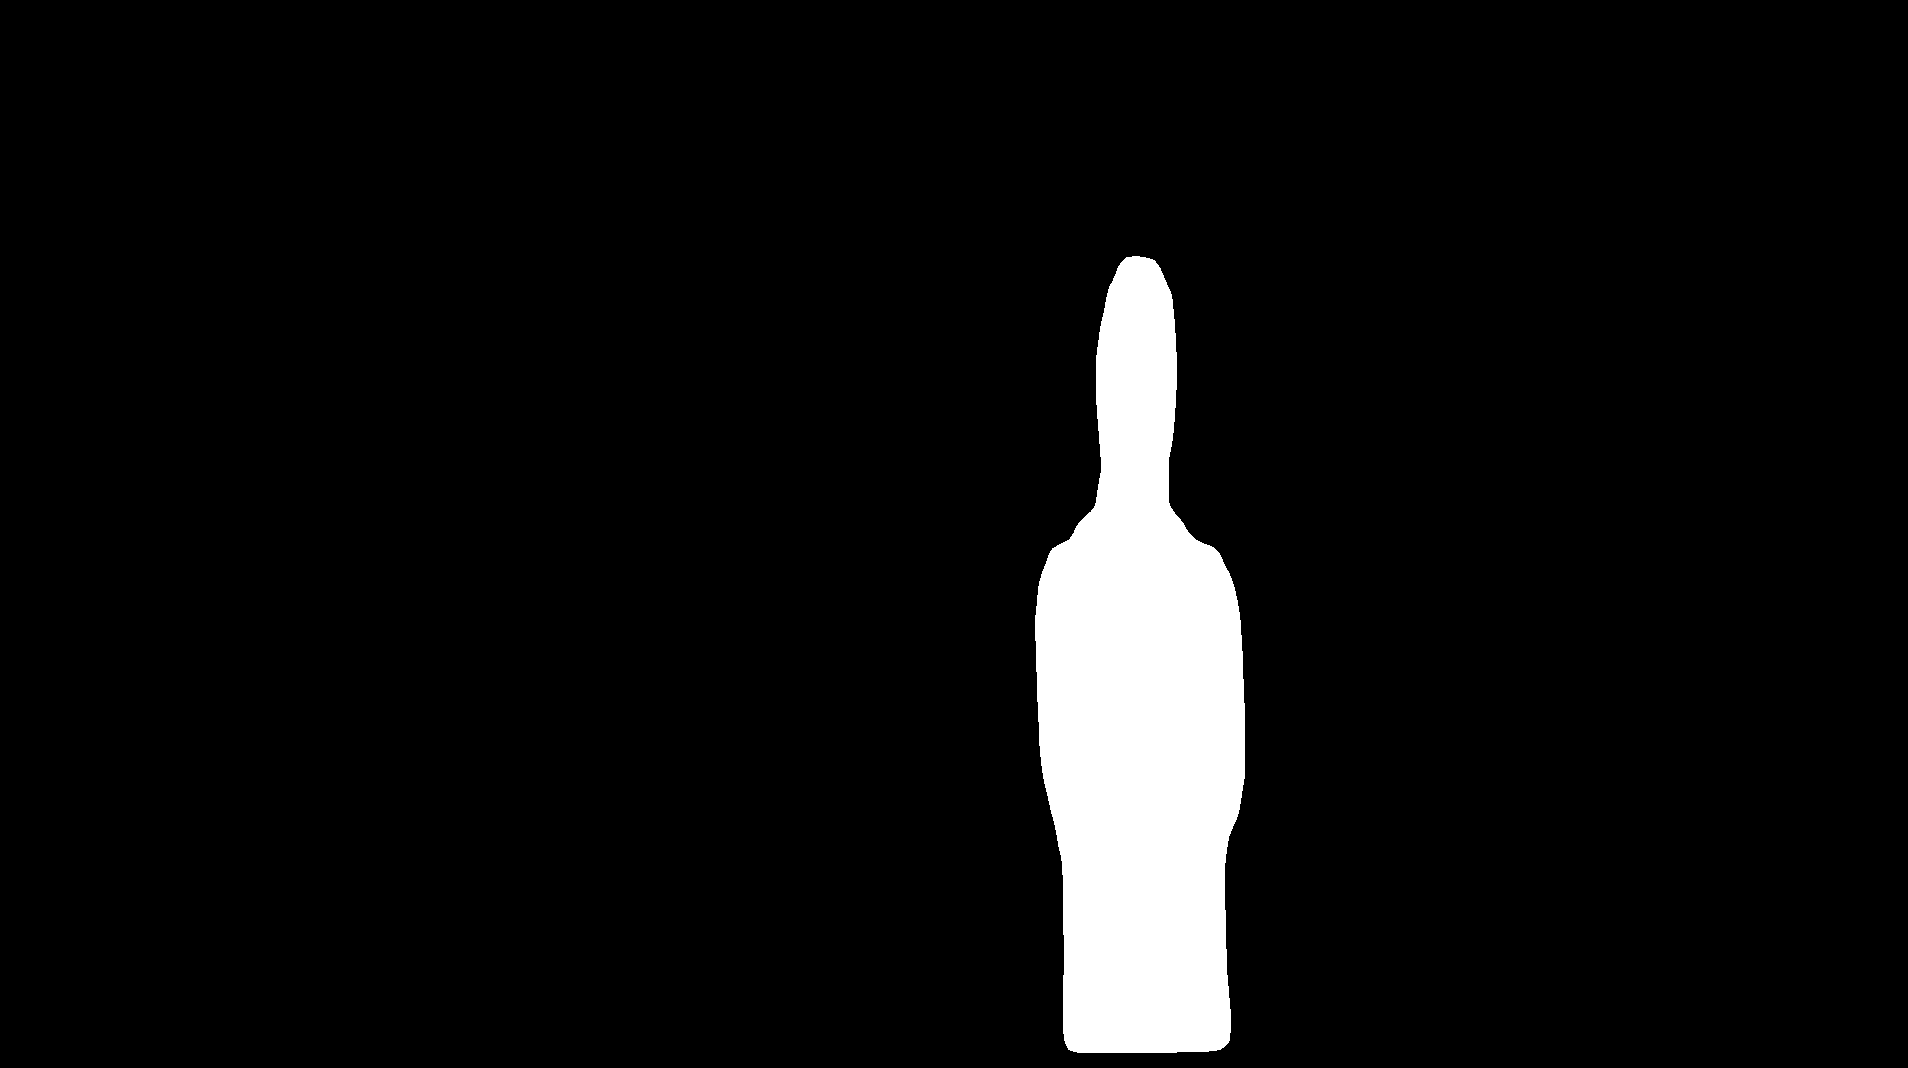

In [23]:
Image.fromarray(erosion_mask.numpy()[0,0].astype('uint8') * 255)

In [24]:
unknown_mask = dilated_mask - erosion_mask

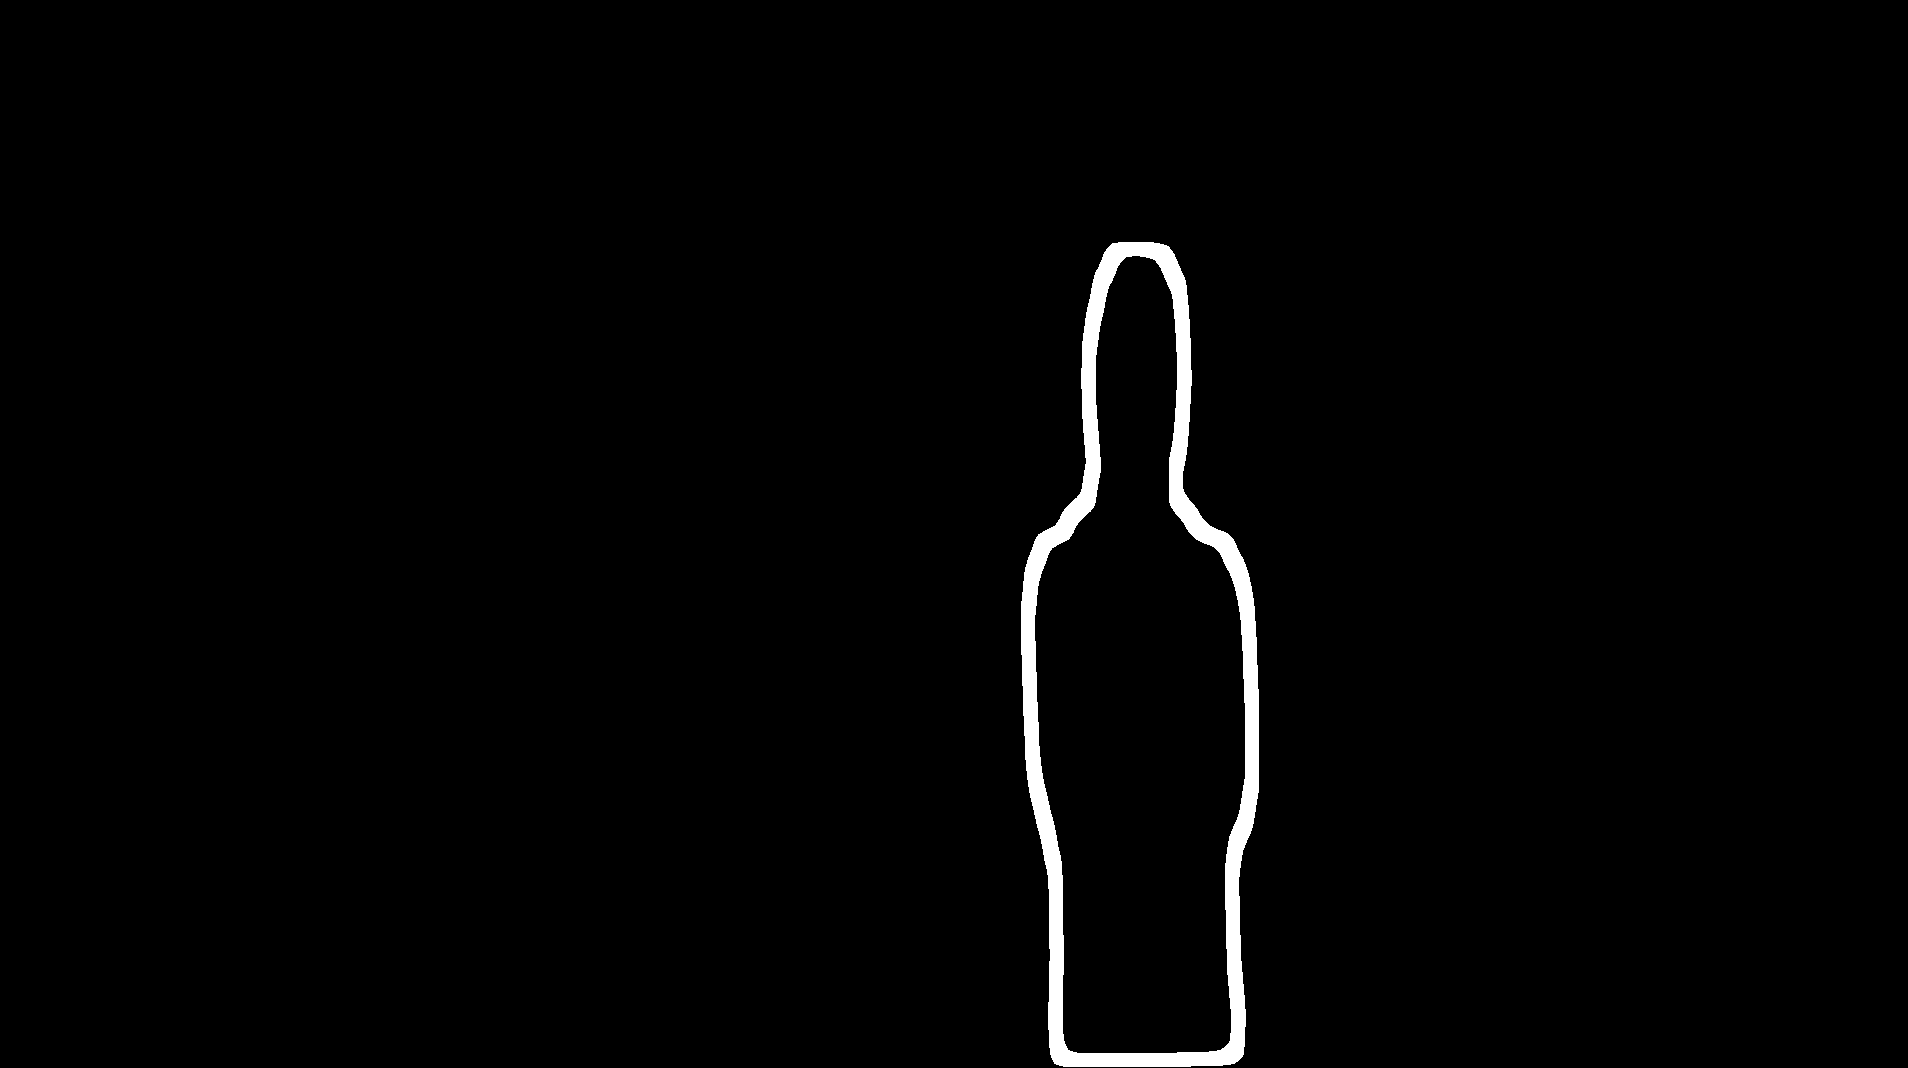

In [25]:
Image.fromarray(unknown_mask.numpy()[0,0].astype('uint8') * 255)

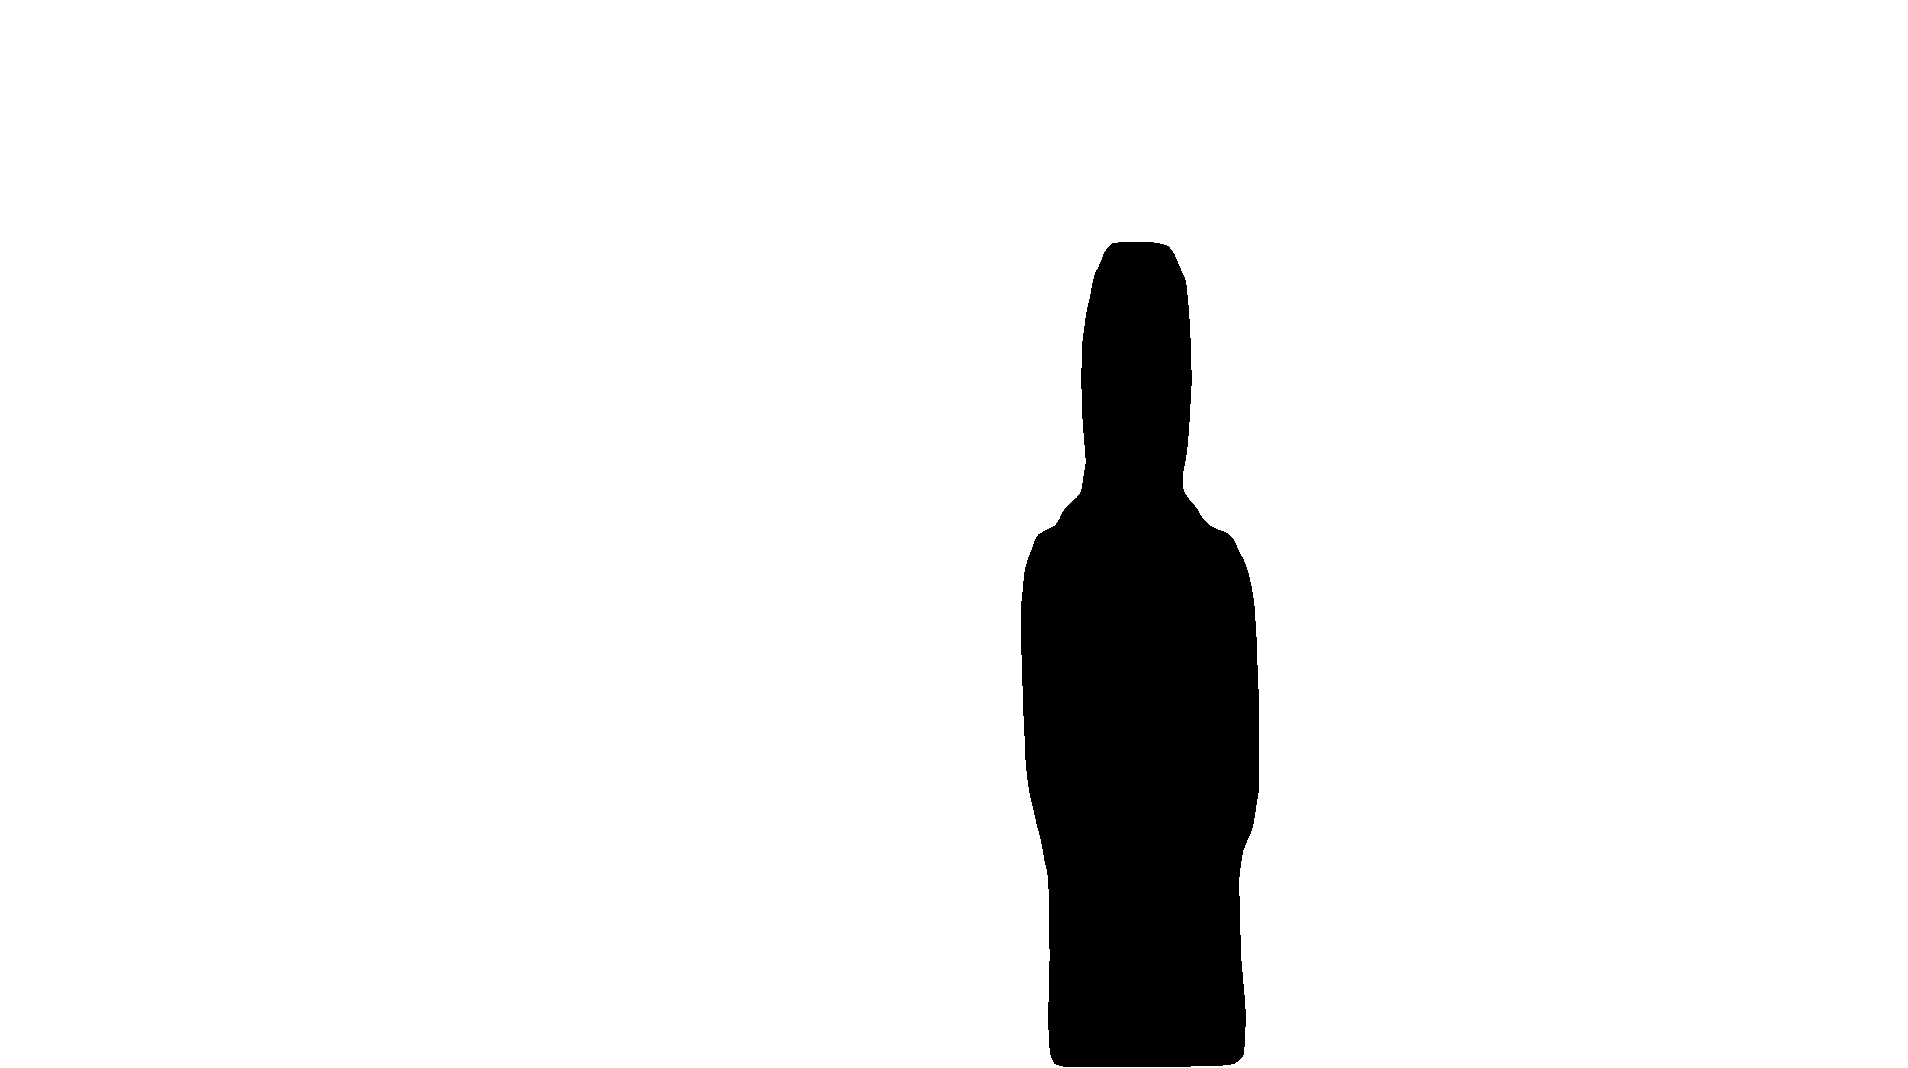

In [26]:
bg_mask = 1 - dilated_mask
Image.fromarray(bg_mask.numpy()[0,0].astype('uint8') * 255)

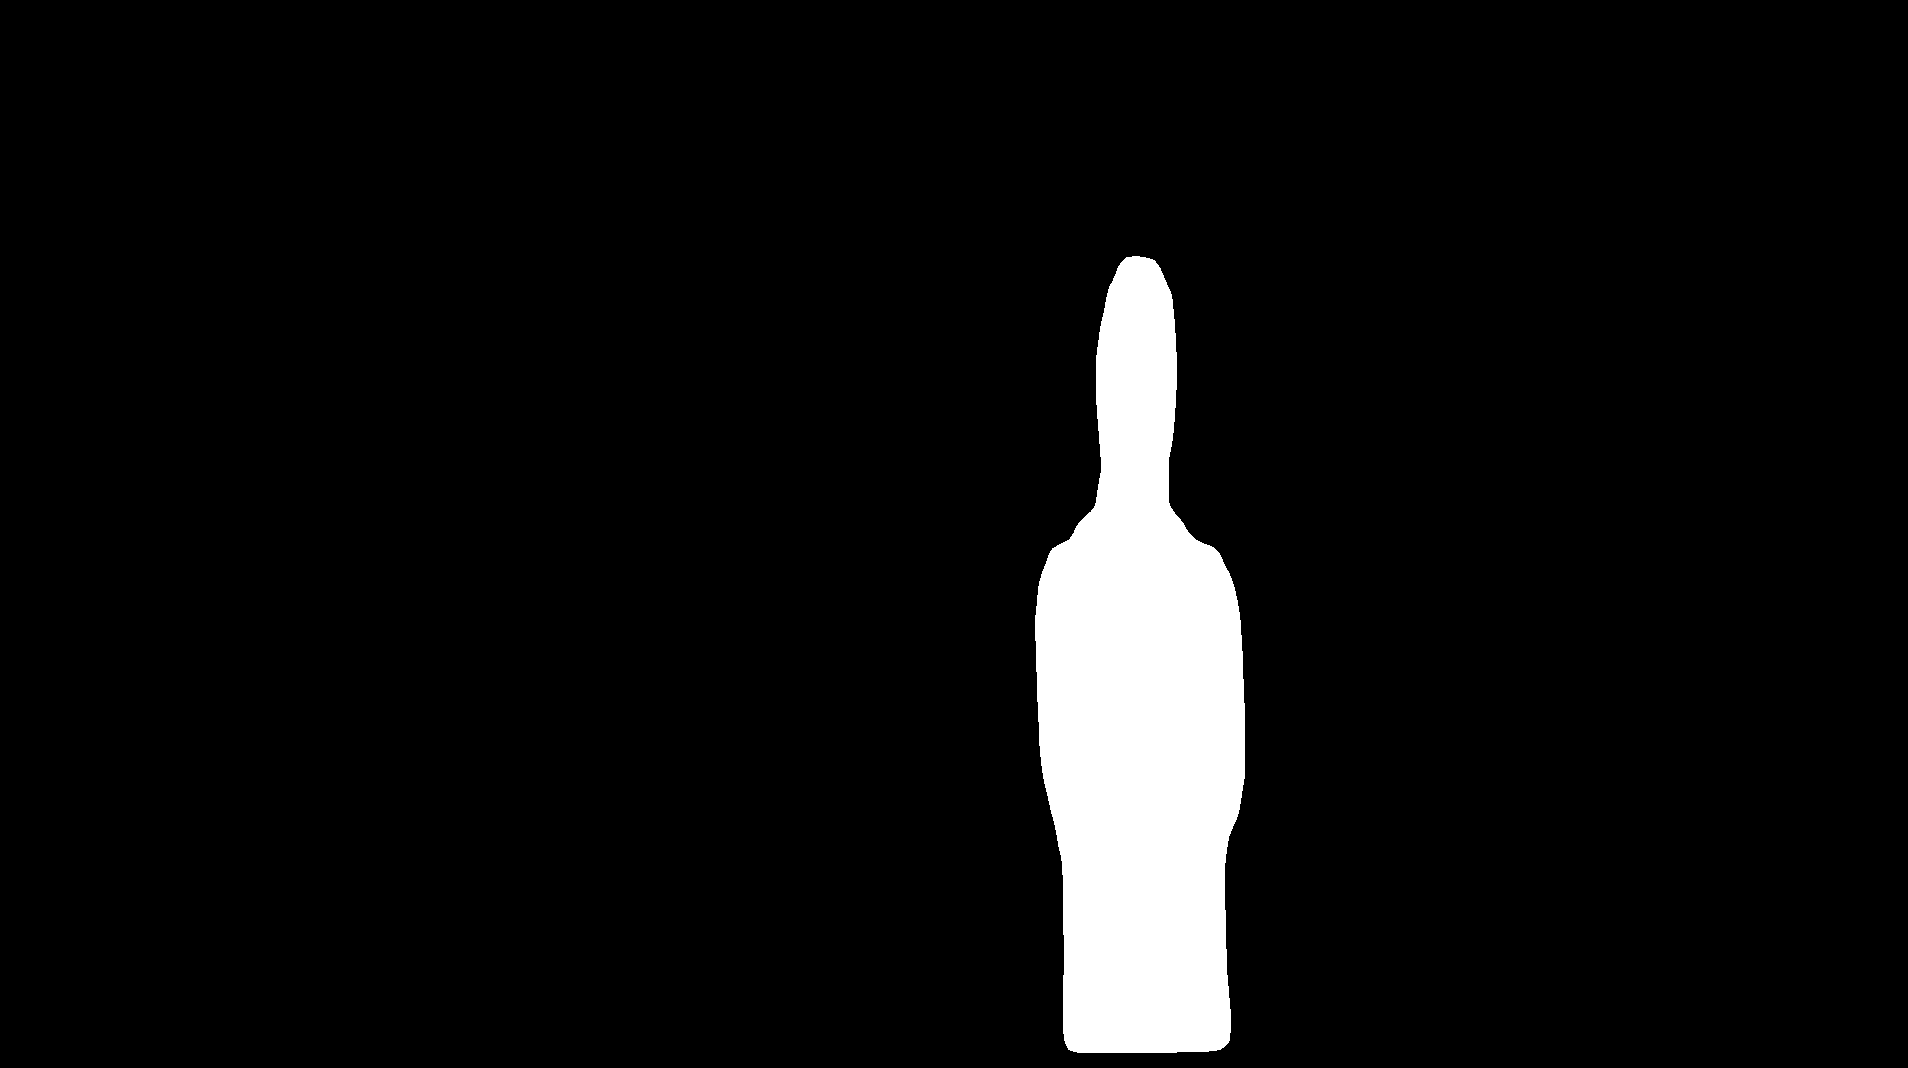

In [27]:
fg_mask = erosion_mask
Image.fromarray(fg_mask.numpy()[0,0].astype('uint8') * 255)